WeatherPy Analysis

     - Temperature has a strong correlation to proximity to the equator. The highest temperatures fall between -20 and 20 latitude.
     - Wind Speed seems to be pretty pretty consistent throughout all latitudes, with a handful of cities that have higher wind speed
     - Cloudiness does not seem to have a correlation with latitude
     - Overall, temperature is most related to latitude

In [2]:
#Import Dependencies
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress

#Create Output File (CSV)
output_data_file = "cities.csv"

In [3]:
#Use CityPy to generate list of cities for weather data

from citipy import citipy


#Set latitude and longitude ranges 

latitide_range = (-90, 90)
longitude_range = (-180, 180)


#Set empty lists to hold city and coordinates
coordinates = []
cities = []

#Set random latitude and longitude coordinates
lats = np.random.uniform(latitide_range[0], latitide_range[1], size=1500)
lngs = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coordinates = zip(lats, lngs)


#Use loop to select closest city to random coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #Add city to city list if unique
    if city not in cities:
        cities.append(city)
        
len(cities)

602

In [4]:
#Set URL config

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Create partial URL with API key

query_url = f'{url}appid={api_key}&units={units}&q='


In [5]:
#Create empty lists for necessary data
city_name = []
latitude = []
longitude= []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_no = []


record = 1

print('Beginning Data Retrieval')
print('------------------------')

#Create for loop to append above lists with weather data
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_no.append(record)
        print(f'Processing Record {record} | {city}')
        
        record = record + 1
        
        time.sleep(1.00)
    
    except Exception:
        print("City not found. Skipping...")
    continue
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 | black river
Processing Record 2 | tuktoyaktuk
City not found. Skipping...
City not found. Skipping...
Processing Record 3 | comodoro rivadavia
Processing Record 4 | melilla
Processing Record 5 | hobart
Processing Record 6 | hovd
Processing Record 7 | ponta do sol
Processing Record 8 | kahului
Processing Record 9 | semnan
Processing Record 10 | rikitea
Processing Record 11 | nikolskoye
Processing Record 12 | bathsheba
Processing Record 13 | kodiak
Processing Record 14 | nadym
Processing Record 15 | lac du bonnet
Processing Record 16 | hof
Processing Record 17 | bridlington
Processing Record 18 | vaini
Processing Record 19 | bredasdorp
Processing Record 20 | bozoum
Processing Record 21 | araouane
Processing Record 22 | faanui
Processing Record 23 | hermanus
Processing Record 24 | calama
Processing Record 25 | petatlan
Processing Record 26 | leshukonskoye
Processing Record 27 | pisco
Processing Record 28 | punta arena

Processing Record 231 | anloga
Processing Record 232 | vardo
Processing Record 233 | sept-iles
Processing Record 234 | seoul
Processing Record 235 | reyes
Processing Record 236 | mochudi
Processing Record 237 | elbistan
Processing Record 238 | montrose
City not found. Skipping...
Processing Record 239 | melfort
Processing Record 240 | buala
Processing Record 241 | bethel
Processing Record 242 | santa marinella
City not found. Skipping...
Processing Record 243 | axim
Processing Record 244 | college
Processing Record 245 | mwinilunga
Processing Record 246 | vila velha
Processing Record 247 | abrau-dyurso
Processing Record 248 | tigre
Processing Record 249 | hatillo
Processing Record 250 | chelmza
City not found. Skipping...
Processing Record 251 | beringovskiy
Processing Record 252 | naze
Processing Record 253 | saint-avold
Processing Record 254 | dzaoudzi
Processing Record 255 | broome
Processing Record 256 | acarau
City not found. Skipping...
Processing Record 257 | ca mau
Processing R

Processing Record 466 | yuza
City not found. Skipping...
Processing Record 467 | puerto escondido
Processing Record 468 | ashqelon
Processing Record 469 | angra dos reis
City not found. Skipping...
Processing Record 470 | craig
City not found. Skipping...
Processing Record 471 | kieta
Processing Record 472 | toora-khem
City not found. Skipping...
Processing Record 473 | namyslow
Processing Record 474 | sibu
Processing Record 475 | bud
Processing Record 476 | kalemie
Processing Record 477 | nantucket
Processing Record 478 | mogadishu
Processing Record 479 | bilibino
Processing Record 480 | natal
Processing Record 481 | klaksvik
Processing Record 482 | shenjiamen
Processing Record 483 | el jicaro
Processing Record 484 | barcelona
Processing Record 485 | kaseda
Processing Record 486 | lipin bor
City not found. Skipping...
Processing Record 487 | kenai
Processing Record 488 | ballina
Processing Record 489 | andenes
Processing Record 490 | tautira
Processing Record 491 | pilar
Processing Re

In [7]:
#Create dictionary for weather DF

weather_dict={
    'City Number': city_no,
    'City': city_name,
    'Country': country,
    'Date': date,
    'Latitude': latitude,
    'Longitude': longitude,
    'Max Temperature (F)': temperature,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df.head()

,City Number,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1,Black River,JM,1606603021,18.03,-77.85,82.40,74,20,9.17
1,2,Tuktoyaktuk,CA,1606603022,69.45,-133.04,6.80,84,90,10.29
2,3,Comodoro Rivadavia,AR,1606602876,-45.87,-67.50,64.40,22,40,20.80
3,4,Melilla,ES,1606603025,35.29,-2.94,59.00,82,0,2.24
4,5,Hobart,AU,1606602859,-42.88,147.33,60.01,82,90,10.29


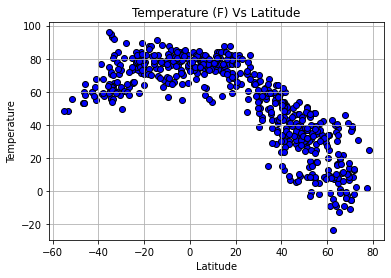

<Figure size 432x288 with 0 Axes>

In [8]:
#Create Scatterplot for Temperature (F) Vs Latitude

plt.scatter(weather_df['Latitude'], weather_df['Max Temperature (F)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Temperature (F) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()
plt.savefig("TempVsLatitude.png")

Scatterplot is comparing temperature to latitude - there appears to be a strong correlation between the two

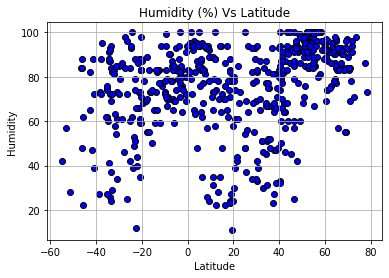

<Figure size 432x288 with 0 Axes>

In [9]:
#Create Scatterplot for Humidity (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Humidity (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()
plt.savefig("HumidityVsLatitude.png")

Scatterplot is comparing humidity to latitude - there appears to be some consistency, however there is a large cluster of cities between the latitudes of 40 and 80 that are extremely humid

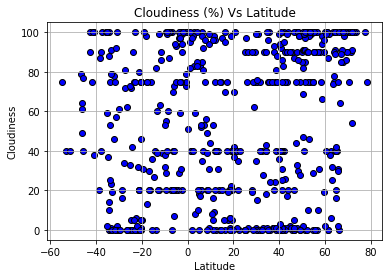

<Figure size 432x288 with 0 Axes>

In [10]:
#Create Scatterplot for Cloudiness (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Cloudiness (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.show()
plt.savefig("CloudinessVsLatitude.png")

Scatterplot is comparing cloudiness to latitude - the two do not seem to be correlated

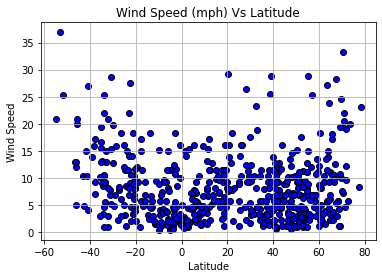

<Figure size 432x288 with 0 Axes>

In [11]:
#Create Scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Wind Speed (mph) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()
plt.savefig("WindSpeedVsLatitude.png")

Scatterplot is comparing wind speed to latitude - most latitudes appear to have a relatively low wind speed, however there are some cities across all latitudes that have higher wind speeds

In [12]:
#Create separate DF for Northern Hemisphere

northern_df = weather_df.loc[weather_df['Latitude'] > 0]
northern_df.head()

,City Number,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1,Black River,JM,1606603021,18.03,-77.85,82.4,74,20,9.17
1,2,Tuktoyaktuk,CA,1606603022,69.45,-133.04,6.8,84,90,10.29
3,4,Melilla,ES,1606603025,35.29,-2.94,59.0,82,0,2.24
5,6,Khovd,MN,1606603027,48.01,91.64,9.1,93,30,0.54
6,7,Ponta do Sol,PT,1606603028,32.67,-17.10,60.8,51,40,8.05


In [13]:
#Create separate DF for Southern Hemisphere
southern_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_df.head()

,City Number,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2,3,Comodoro Rivadavia,AR,1606602876,-45.87,-67.50,64.40,22,40,20.80
4,5,Hobart,AU,1606602859,-42.88,147.33,60.01,82,90,10.29
9,10,Rikitea,PF,1606603032,-23.12,-134.97,76.82,79,100,14.14
17,18,Vaini,TO,1606603042,-21.20,-175.20,84.20,66,20,18.34
18,19,Bredasdorp,ZA,1606603043,-34.53,20.04,55.40,87,10,3.36


The r-value is: -0.8715075451277233


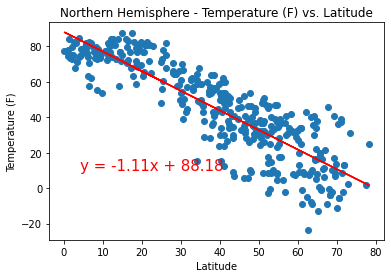

<Figure size 432x288 with 0 Axes>

In [14]:
#Create Linear Regression for Northern Hemisphere - Temperature (F) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("NorthTempVsLat.png")

Scatterplot compares max temperature of the northern hemisphere to latitude - temperature decreases as latitude increases

The r-value is: 0.5166061989399112


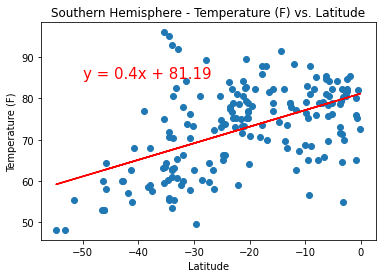

<Figure size 432x288 with 0 Axes>

In [15]:
#Create Linear Regression for Southern Hemisphere - Temperature (F) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("SouthTempVsLat.png")

Scatterplot compares max temperature of the southern hemisphere to latitude - temperature decreases as latitude decreases

The r-value is: 0.3173740211052812


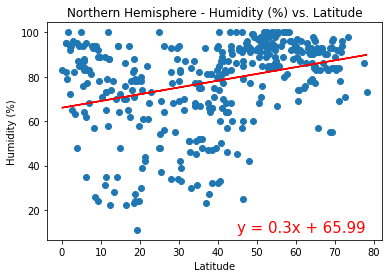

<Figure size 432x288 with 0 Axes>

In [16]:
#Create Linear Regression for Northern Hemisphere - Humidity (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("NorthHumidityVsLat.png")

Scatterplot compares humidity temperature of the northern hemisphere to latitude - overall the northern hemisphere has medium to high humidity but there does not seem to be a strong correlation to latitude.

The r-value is: 0.3073293217561218


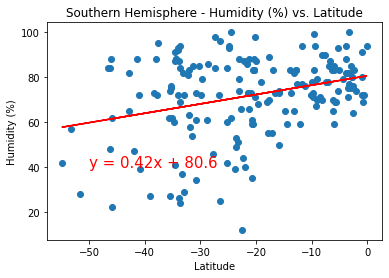

<Figure size 432x288 with 0 Axes>

In [17]:
#Create Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("SouthHumidityVsLat.png")

Scatterplot compares humidity of the southern hemisphere to latitude - once again little relationship between latitude and humidity

The r-value is: 0.2899214183144352


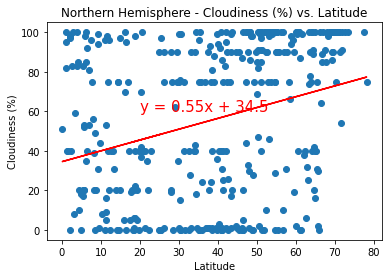

<Figure size 432x288 with 0 Axes>

In [18]:
#Create Linear Regression for Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("NorthCloudinessVsLat.png")

Scatterplot compares cloudiness of the northern hemisphere to latitude - very weak relationship between the two

The r-value is: 0.12227696040181743


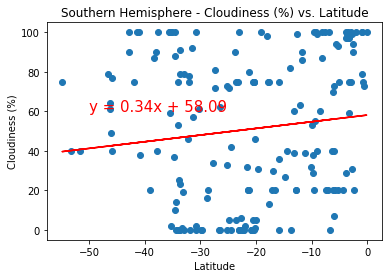

<Figure size 432x288 with 0 Axes>

In [19]:
#Create Linear Regression for Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("SouthCloudinessVsLat.png")

Scatterplot compares cloudiness of the southern hemisphere to latitude - slightly higher relationship than northern hemisphere but still not significant

The r-value is: 0.16195084447418404


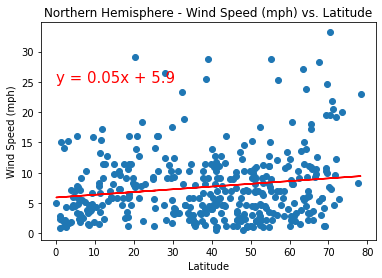

<Figure size 432x288 with 0 Axes>

In [20]:
#Create Linear Regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("NorthWindSpeedVsLat.png")

Scatterplot compares windspeed of the northern hemisphere to latitude - very little relationship between the two

The r-value is: -0.4784691721565619


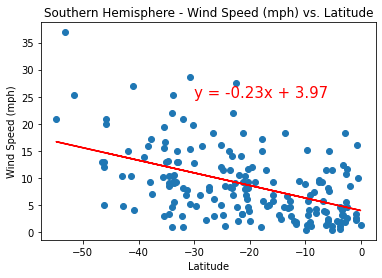

<Figure size 432x288 with 0 Axes>

In [21]:
#Create Linear Regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("SouthWindSpeedVsLat.png")

Scatterplot compares windspeed of the southern hemisphere to latitude - once again little relationship between latitude and windspeed